# Get SRTM data with the Topography class

This notebook describes how to download Shuttle Radar Topography Mission (SRTM) elevation data
using the `Topography` class included in the `bmi-topography` package.

## Setup

To ensure all dependencies are met, set up a conda environment using the environment file found in the root directory of this repository:
```
conda env create --file=environment.yml
```

Then install the `bmi-topography` package:
```
make install
```

## Fetch and load data

Import the `Topography` class from the newly installed `bmi-topography` package:

In [1]:
from bmi_topography import Topography

`Topography` downloads and stores SRTM data through the [OpenTopography](https://opentopography.org/) [REST API](https://portal.opentopography.org/apidocs/#/Public/getGlobalDem). OpenTopography is an NSF-supported project that provides open access to high-resolution topography data and services.

Create an instance of `Topography` using parameters to describe

* the type of data requested,
* the geographic bounding box of the data,
* the file format, and 
* where to store the file

with the following step:

In [2]:
topo = Topography(
    dem_type="SRTMGL3",
    south=36.738884,
    north=38.091337,
    west=-120.168457,
    east=-118.465576,
    output_format="GTiff",
    cache_dir="."
    )

While this step sets up a call to the OpenTopography API, it doesn't download the data. Download the data by calling the `fetch` method:

In [3]:
fname = topo.fetch()
print(fname)

/Users/mpiper/projects/bmi-topography/examples/SRTMGL3_36.738884_-120.168457_38.091337_-118.465576.tif


This step may take a few moments to run while the data are fetched from OpenTopography and downloaded.

The `fetch` method only downloads data; it doesn't load it into memory. Call the `load` method to open the downloaded  file and load it into an `xarray` DataArray:

In [4]:
da = topo.load()
print(da)

<xarray.DataArray 'SRTMGL3' (band: 1, y: 1623, x: 2043)>
[3315789 values with dtype=int16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -120.2 -120.2 -120.2 ... -118.5 -118.5 -118.5
  * y            (y) float64 38.09 38.09 38.09 38.09 ... 36.74 36.74 36.74 36.74
    spatial_ref  int64 0
Attributes:
    _FillValue:    0.0
    scale_factor:  1.0
    add_offset:    0.0
    units:         meters
    location:      node


Note that `load` calls `fetch`, so the latter can be omitted if the goal is the get the data into memory.

## Visualize

Finally, let's visualize the downloaded elevation data.

In [5]:
import matplotlib

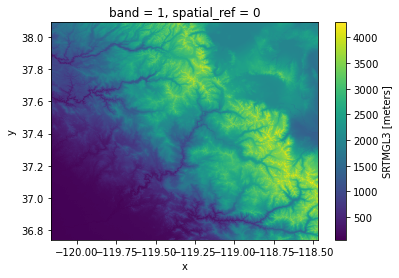

In [6]:
da.plot()